What percentage of hot tubs are in each rating category? (5-Star vs 4-Star vs 3-Star vs 2-Star vs 1-Star)

In [1]:
# Summary:
# Most of the Airbnbs fall within the 4 and 5-star categories.  4-star Airbnbs are far more prevalent and account for just over 73% of the properties. The breakdown is as follows:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


In [3]:
# import CSV data
combined_data = pd.read_csv("Resources/combined_data.csv")


In [4]:
# narrow down data to only entries with hot tubs
hot_tub_data = combined_data.loc[combined_data["has_hot_tub"]==True]
hot_tub_data

,Unnamed: 0,Unnamed: 0.1,id,last_scraped,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,has_hot_tub,has_private_hot_tub,price,number_of_reviews,last_review,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
6,6,6,2708,2022-09-10,3008,t,Hollywood,34.096250,-118.346050,Private room,True,False,$93.00,37,2022-03-19,4.81,5.00,4.86,0.37
22,22,22,6931,2022-09-10,3008,t,Hollywood,34.094903,-118.347658,Private room,True,False,$109.00,30,2022-08-01,4.85,4.73,4.73,0.19
27,27,27,7992,2022-09-10,22363,t,Atwater Village,34.113640,-118.260680,Entire home/apt,True,True,$100.00,269,2022-08-07,4.95,4.94,4.89,2.04
32,32,32,65467,2022-09-10,61864,f,Culver City,34.024380,-118.383740,Private room,True,True,$300.00,0,NaN,NaN,NaN,NaN,NaN
35,35,35,67089,2022-09-10,210344,t,Culver City,34.009850,-118.407980,Entire home/apt,True,False,$140.00,684,2022-07-20,4.95,4.91,4.87,4.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81454,1567,1567,685670933505691842,2022-09-28,50309454,f,City of Scotts Valley,37.046301,-122.025398,Entire home/apt,True,False,$140.00,0,NaN,NaN,NaN,NaN,NaN
81475,1588,1588,700613538965524054,2022-09-28,34752022,f,Unincorporated Areas,37.017277,-122.033562,Entire home/apt,True,True,$361.00,3,2022-09-25,4.33,5.00,4.67,2.81
81502,1615,1615,717537256366318766,2022-09-28,4590420,f,City of Santa Cruz,36.966424,-121.995618,Entire home/apt,True,True,$425.00,0,NaN,NaN,NaN,NaN,NaN
81504,1617,1617,719189418563417935,2022-09-28,41218462,f,Unincorporated Areas,37.148520,-122.148560,Entire home/apt,True,True,$354.00,0,NaN,NaN,NaN,NaN,NaN


In [5]:
#create new df with only necessary columns
cleaned_hot_tub = hot_tub_data[["review_scores_value", 'latitude', "longitude", "neighbourhood_cleansed","host_is_superhost"]]

In [6]:
# Determine min and max for binning purposes
print(hot_tub_data["review_scores_value"].min())
print(hot_tub_data["review_scores_value"].max())

1.0
5.0


In [7]:
# Create bins in which to place values based upon IMDB vote count
bins = [0.99, 1.99, 2.99, 3.99, 4.99, 5]

# Create labels for these bins
ratings = ["1-star", "2-stars", "3-stars", "4-stars", "5-stars"]

In [8]:
# put data in bins
cleaned_hot_tub["star rating"]  = pd.cut(cleaned_hot_tub["review_scores_value"], bins, labels=ratings)
cleaned_hot_tub

,review_scores_value,latitude,longitude,neighbourhood_cleansed,host_is_superhost,star rating
6,4.86,34.096250,-118.346050,Hollywood,t,4-stars
22,4.73,34.094903,-118.347658,Hollywood,t,4-stars
27,4.89,34.113640,-118.260680,Atwater Village,t,4-stars
32,NaN,34.024380,-118.383740,Culver City,f,NaN
35,4.87,34.009850,-118.407980,Culver City,t,4-stars
...,...,...,...,...,...,...
81454,NaN,37.046301,-122.025398,City of Scotts Valley,f,NaN
81475,4.67,37.017277,-122.033562,Unincorporated Areas,f,4-stars
81502,NaN,36.966424,-121.995618,City of Santa Cruz,f,NaN
81504,NaN,37.148520,-122.148560,Unincorporated Areas,f,NaN


In [9]:
# drop null rows
cleaned_hot_tub = cleaned_hot_tub.dropna()

In [10]:
cleaned_hot_tub["review_scores_value"].isna().sum()

0

In [11]:
# check to see how many are in each category
hot_tub_group = cleaned_hot_tub.groupby(["star rating","host_is_superhost"]).count()
hot_tub_group

review_scores_value  latitude  longitude  \
star rating host_is_superhost                                             
1-star      f                                 11.0      11.0       11.0   
            t                                  NaN       NaN        NaN   
2-stars     f                                  9.0       9.0        9.0   
            t                                  3.0       3.0        3.0   
3-stars     f                                105.0     105.0      105.0   
            t                                 11.0      11.0       11.0   
4-stars     f                               2211.0    2211.0     2211.0   
            t                               2169.0    2169.0     2169.0   
5-stars     f                               1024.0    1024.0     1024.0   
            t                                449.0     449.0      449.0   

                               neighbourhood_cleansed  
star rating host_is_superhost                          
1-star      f                                    11.0  
            t                                     NaN  
2-stars     f                                     9.0  
            t                                     3.0  
3-stars     f                                   105.0  
            t                                    11.0  
4-stars     f                                  2211.0  
            t                                  2169.0  
5-stars     f                                  1024.0  
            t                                   449.0

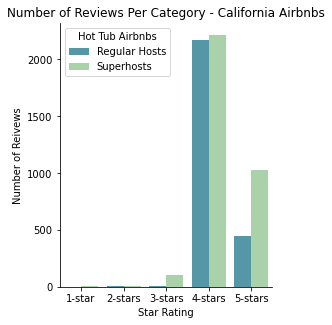

In [18]:
#chart the number of reviews in each star category for hosts and superhosts
sns.catplot(x='star rating', hue='host_is_superhost', data=cleaned_hot_tub, kind='count', errorbar=None, legend=False).set(title='Number of Reviews Per Category - California Airbnbs')
plt.legend(labels=["Regular Hosts", "Superhosts"], title ="Hot Tub Airbnbs")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reivews")
sns.set_palette ("Spectral_r", 45)
plt.subplots_adjust(top=0.85, right=.75)
plt.savefig("images/StarRating.png")

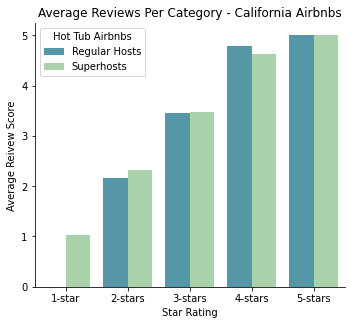

In [13]:
# Average Reviews for each star category
sns.catplot(x='star rating', y='review_scores_value', hue='host_is_superhost', legend=False, data=cleaned_hot_tub, kind='bar', errorbar=None).set(title='Average Reviews Per Category - California Airbnbs')
plt.legend(labels=["Regular Hosts", "Superhosts"], title ="Hot Tub Airbnbs")
plt.xlabel("Star Rating")
plt.ylabel("Average Reivew Score")
sns.set_palette("Spectral", 24)
plt.subplots_adjust(top=0.85)
plt.savefig("images/AverageStarRating.png")


hot_tub_group.plot(kind="bar", y="review_scores_value")

In [14]:
hot_tub_group['review_scores_value'].values

array([  11.,   nan,    9.,    3.,  105.,   11., 2211., 2169., 1024.,
        449.])

In [15]:
# total_hottubs
total_hottubs = cleaned_hot_tub["review_scores_value"].count()


In [20]:
# number hottubs per rating
one_star = cleaned_hot_tub.loc[cleaned_hot_tub["star rating"] == "1-star"].count()["review_scores_value"]
two_star = cleaned_hot_tub.loc[cleaned_hot_tub["star rating"] == "2-stars"].count()["review_scores_value"]
three_star = cleaned_hot_tub.loc[cleaned_hot_tub["star rating"] == "3-stars"].count()["review_scores_value"]
four_star = cleaned_hot_tub.loc[cleaned_hot_tub["star rating"] == "4-stars"].count()["review_scores_value"]
five_star = cleaned_hot_tub.loc[cleaned_hot_tub["star rating"] == "5-stars"].count()["review_scores_value"]
stars = [one_star, two_star, three_star, four_star, five_star]
stars

[11, 12, 116, 4380, 1473]

In [21]:
# percentage hottubs per rating
one_star_perct = ((one_star/total_hottubs)*100).round(2)
two_star_perct = ((two_star/total_hottubs)*100).round(2)
three_star_perct = ((three_star/total_hottubs)*100).round(2)
four_star_perct = ((four_star/total_hottubs)*100).round(2)
five_star_perct = ((five_star/total_hottubs)*100).round(2)
star_perct = [one_star_perct, two_star_perct, three_star_perct, four_star_perct, five_star_perct]
star_perct

[0.18, 0.2, 1.94, 73.1, 24.58]

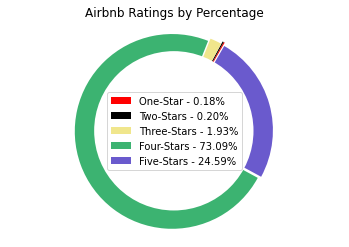

In [22]:
# Percentage of x-star Airbnbs
labels = ["One-Star - 0.18%", "Two-Stars - 0.20%", "Three-Stars - 1.93%", "Four-Stars - 73.09%", "Five-Stars - 24.59%"]
colors =["red", "black", "khaki", "mediumseagreen", "slateblue"]
explode = (0.05, 0.05, 0.02, 0.02, 0.02)

plt.pie(star_perct, colors=colors, radius=1.1, explode=explode, startangle=60, shadow=False)
plt.axis('equal')
plt.title("Airbnb Ratings by Percentage")
plt.legend(labels, loc="center")

center = plt.Circle((0,0), .90, fc="white")
circle = plt.gcf()


circle.gca().add_artist(center)
plt.savefig("images/DonutPercentRating.png")

# 1-star 0.18%
# 2-star 0.2%
# 3-star 1.93%
# 4-star 73.09%
# 5-star 24.59%
